In [1]:
!pip install datasets


DEPRECATION: Loading egg at /opt/homebrew/lib/python3.11/site-packages/dnspython-2.1.1.dev472+g8231eaa-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from datasets import load_dataset

# Load dataset
dataset = load_dataset("Deysi/sentences-and-emotions")

# Convert to pandas DataFrame
df = pd.DataFrame(dataset['train'])

# Check the data
print(df.head())

# Split data into features and labels
X = df['utterance']
y = df['emotion']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


                                           utterance   emotion
0                         The blake's got divorced .   neutral
1                                     Really ? Why ?   neutral
2  Mr . black has been getting a little around as...   neutral
3  I'm surprised . He does't look like a guy who'...  surprise
4  No , he doesn't . But his wife found out he ha...   neutral


In [3]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform training data, and transform test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [4]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_tfidf, y_train)


RandomForestClassifier(random_state=42)

In [5]:
# Make predictions
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6528
Classification Report:
              precision    recall  f1-score   support

       anger       0.56      0.21      0.30        24
     disgust       0.00      0.00      0.00         3
        fear       0.00      0.00      0.00         6
   happiness       0.67      0.50      0.57       134
     neutral       0.66      0.86      0.75       272
     sadness       0.50      0.15      0.24        26
    surprise       0.44      0.25      0.32        16

    accuracy                           0.65       481
   macro avg       0.40      0.28      0.31       481
weighted avg       0.63      0.65      0.62       481



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


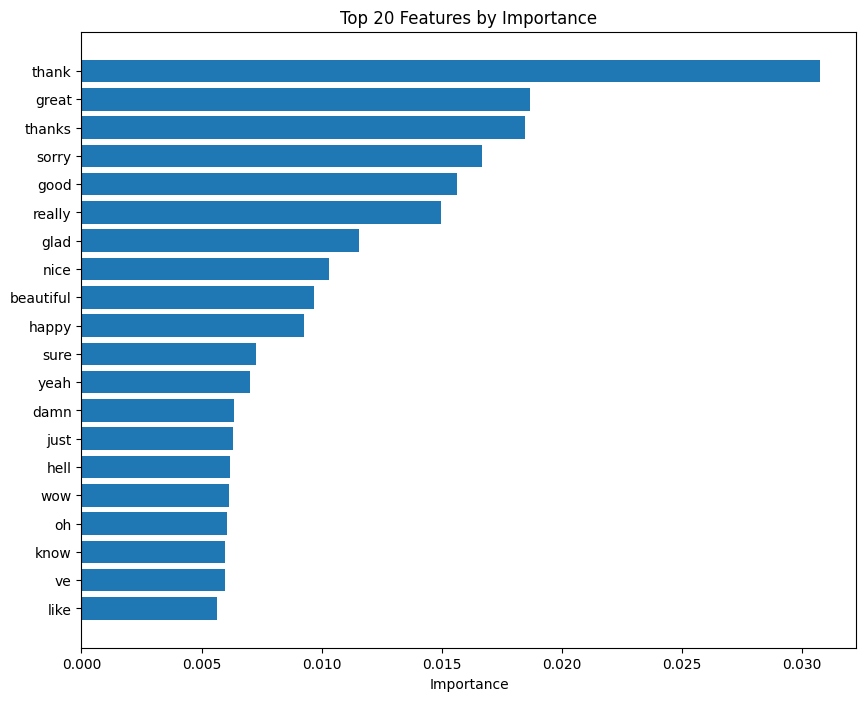

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature names and importances
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
importances = rf_classifier.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 20 features
top_features = feature_importance_df.head(20)
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 20 Features by Importance')
plt.gca().invert_yaxis()
plt.show()


this is the random forest and tf idf

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv('sampled_data.csv', header=None, names=['text', 'label'], delimiter=',', quoting=3)

# Split data into features and labels
X = df['text']
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text data to numerical data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vect, y_train)

# Predict on the test set
y_pred = model.predict(X_test_vect)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Test the model with new examples
new_examples = [
    "I am so excited about the upcoming vacation!",
    "I feel completely overwhelmed with work right now.",
    "The kids are really making me angry today."
]

# Convert new examples to numerical data using the same vectorizer
new_examples_vect = vectorizer.transform(new_examples)

# Predict emotions for the new examples
predictions = model.predict(new_examples_vect)

# Output predictions
for example, prediction in zip(new_examples, predictions):
    print(f"Text: {example}")
    print(f"Predicted Emotion: {prediction}")
    print()


Accuracy: 0.7333333333333333
Classification Report:
              precision    recall  f1-score   support

       anger       0.88      0.66      0.76       162
        fear       0.84      0.72      0.78       151
         joy       0.56      0.67      0.61       148
        love       0.81      0.81      0.81       143
     sadness       0.52      0.54      0.53       141
    surprise       0.85      0.99      0.91       155

    accuracy                           0.73       900
   macro avg       0.74      0.73      0.73       900
weighted avg       0.75      0.73      0.73       900

Text: I am so excited about the upcoming vacation!
Predicted Emotion: joy

Text: I feel completely overwhelmed with work right now.
Predicted Emotion: surprise

Text: The kids are really making me angry today.
Predicted Emotion: anger

